In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

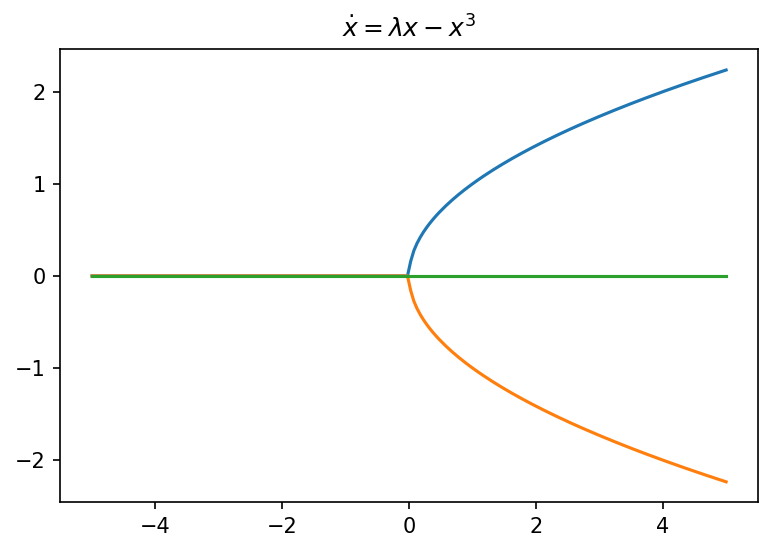

In [2]:
#get my embedding algorithm
def EmbeddingAlg(param_list, guess, F):
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X
#the differential equaiton
def F(x, λ):
    return λ*x-x**3

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(5, -5, 200), np.sqrt(5), F)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(5, -5, 200), -np.sqrt(5), F)
#the zero curve
C3, X3 = EmbeddingAlg(np.linspace(5, -5, 200),  0, F)

#plot the figure
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)
ax.plot(C1, X1)
ax.plot(C2, X2)
ax.plot(C3, X3)
ax.set_title(r'$\dot{x} = \lambda x - x^3$')

plt.show()


# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

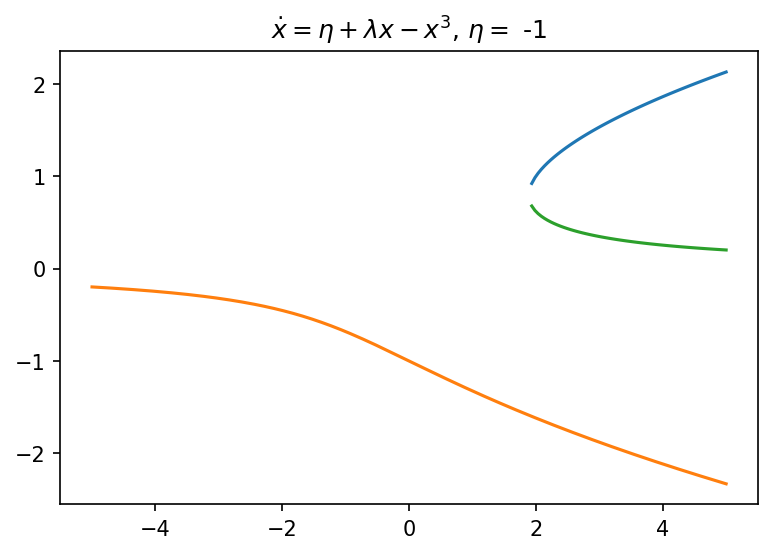

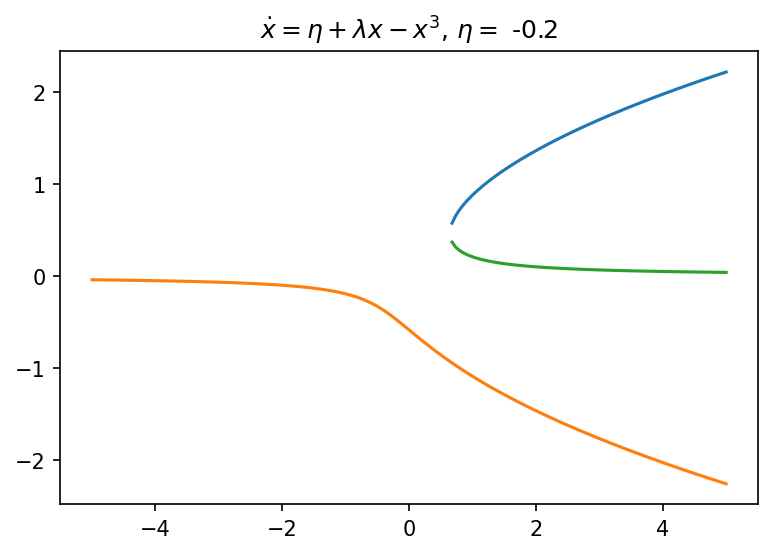

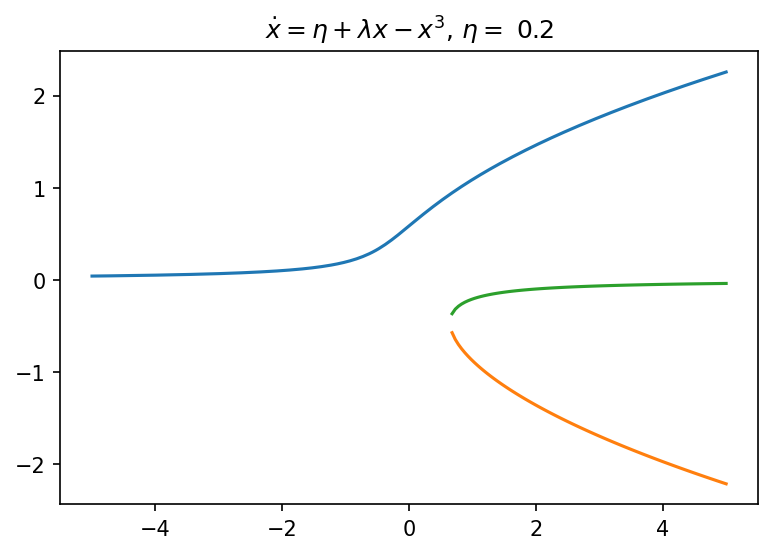

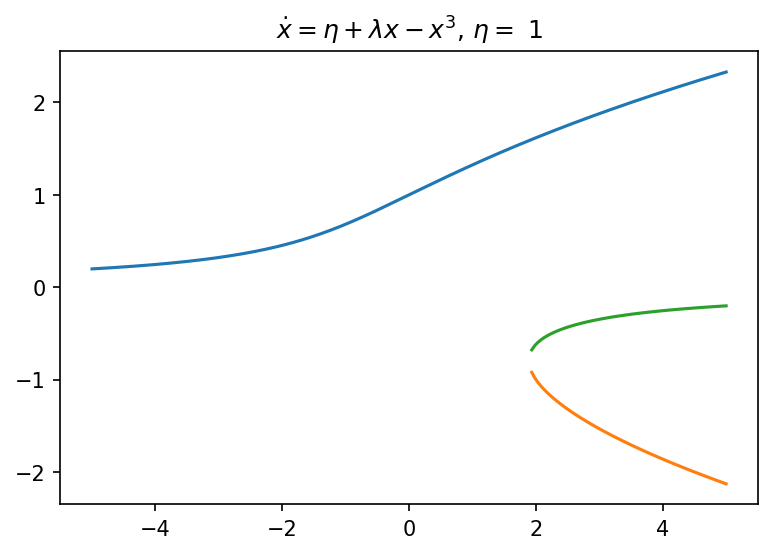

In [3]:
#new Embedding algorithm that takes into account the eta values
def EmbeddingAlgParams(param_list, guess, F, extra_args):
    X = []
    for param in param_list:
        try:
            extra_args = np.atleast_1d(extra_args)
            param = [param]
            for arg in extra_args:
                param.append(arg)
            # Solve for x_value making F(x_value, param) = 0.
            x_value = newton(F, guess, fprime=None, args=param, tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration.
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

#define the differential equaiton
def F(x, λ, η):
    return η+λ*x-x**3

#the eta values to draw the bifurcation diagram with
η_vals = [-1, -0.2, 0.2, 1]
#we can now iterate through the eta values to get all the bifurcation diagrams.

for i, η in  enumerate(η_vals):
    # Top curve shown in the bifurcation diagram
    C1, X1 = EmbeddingAlgParams(np.linspace(5, -5, 200), np.sqrt(5), F, η)
    # The bottom curve
    C2, X2 = EmbeddingAlgParams(np.linspace(5, -5, 200), -np.sqrt(5), F, η)
    #the zero curve
    C3, X3 = EmbeddingAlgParams(np.linspace(5, -5, 200),  0, F, η)

    #plot the figure
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(C1, X1)
    ax.plot(C2, X2)
    ax.plot(C3, X3)
    ax.set_title(r'$\dot{x} = \eta + \lambda x - x^3$, $\eta = $ ' + str(η))
    plt.show()


# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x)^2,

where r = 0.56

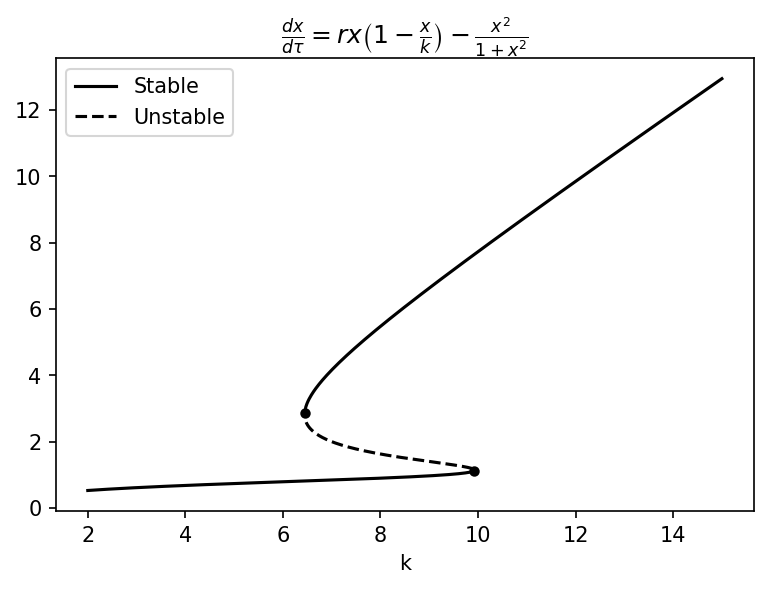

In [4]:
def F1(x, k):
    r = 0.56
    return r*x*(1 - x/k) -x**2/(1+x**2) 

# Top curve shown in the bifurcation diagram
C1, X1 = EmbeddingAlg(np.linspace(15, 5.9, 400), 14, F1)
# The bottom curve
C2, X2 = EmbeddingAlg(np.linspace(2, 10, 400), 1/2, F1)
#the bottom curve
C3, X3 = EmbeddingAlg(np.linspace(9.9,5.95,400), X2[-1]+0.1, F1)

#plot the figure
fig = plt.figure()
fig.set_dpi(150)
ax = fig.add_subplot(111)
ax.plot(C1, X1, 'k-')
ax.plot(C2, X2, 'k-', label='Stable')
ax.plot(C3, X3, 'k--', label='Unstable')
ax.plot(C1[-1], X1[-1], 'ko', markersize=4)
ax.plot(C2[-1], X2[-1], 'ko', markersize=4)
ax.legend(loc='best')
ax.set_xlabel('k')
ax.set_title(r'$\frac{dx}{d\tau} = rx\left(1 - \frac{x}{k}\right) - \frac{x^2}{1+x^2}$')
plt.show()
